# Recover injected signals from synthetic lightcurves

In this notebook we inject and recover signals to assess the limits of signal discovery in K2 lightcurves.

In [5]:
from __future__ import print_function
from pprint import pprint
from lightkurve import KeplerTargetPixelFile
import numpy as np
import matplotlib.pyplot as plt
import sncosmo
from astropy.table import Table
%matplotlib inline

Let's get a galaxy target pixel file from MAST.

In [3]:
tpf = KeplerTargetPixelFile.from_archive(220381074)   #KeplerTargetPixelFile
lc = tpf.to_lightcurve(aperture_mask='all')           #KeplerLightCurve

#Remove nans and outliers
lc = lc.remove_nans().remove_outliers()   

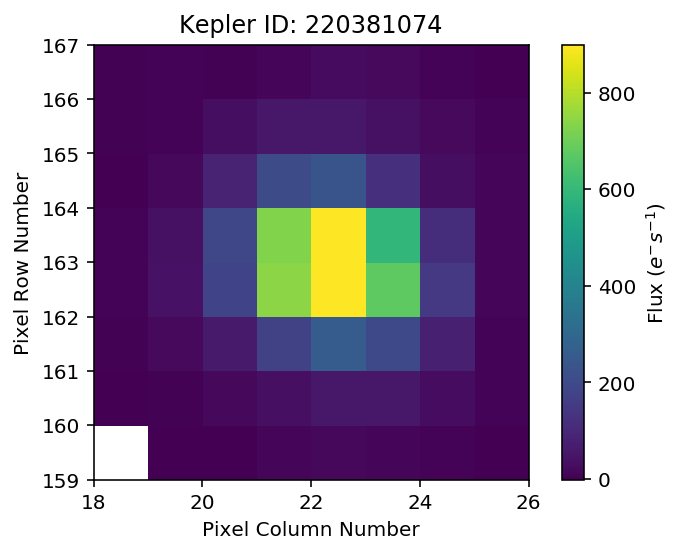

In [6]:
tpf.plot();

In [8]:
import lightkurve.injection as inj

In [9]:
model = inj.SupernovaModel(T0=2600, source='hsiao', bandpass='kepler', z=0.5, amplitude=3.e-4)

lcinj = inj.inject(lc, model)

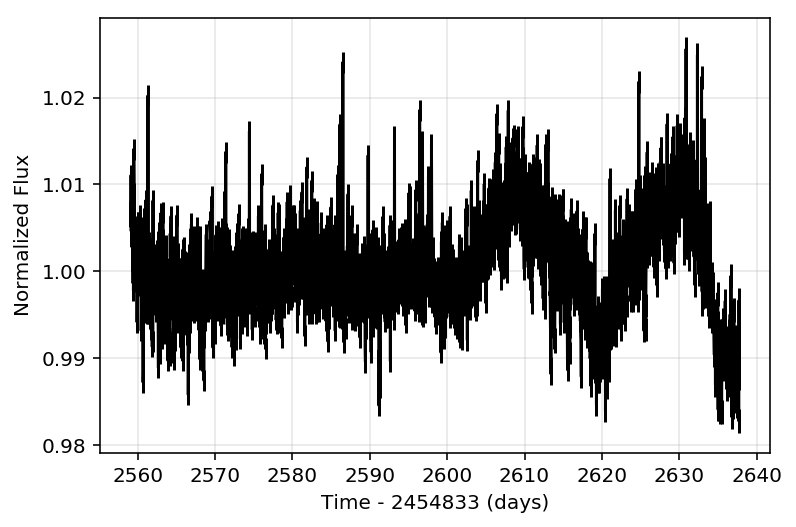

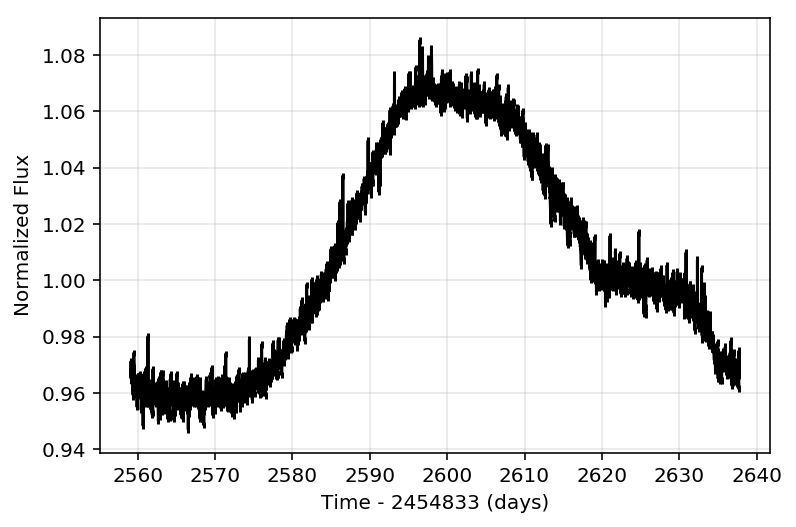

In [13]:
lc.plot()
lcinj.plot();

In [15]:
lcinj = lcinj.remove_nans()
lcinj = lcinj.normalize()

### Now attempt to "recover" the signal through fitting methods

Fitting methods include:
    - optimization (e.g. `scipy.optimize`)
    - MCMC sampling (e.g. `emcee`)
    
The goal at the end would be to compare the **True parameters**---that is, the values that were input to make the synthetic lightcurve--- with the *recovered parameters*, the ones that we derived from our fit.  We would call the signal "sucessfully" recovered if the *recovered parameters* match the True parameters to within either:
    - A fixed tolerance level, *or*
    - A threshold of estimated uncertainty of parameters (e.g. $>1\sigma$), both within the injected signal *and* above zero by some other threshold (e.g. $>3\sigma$). 
    
So for example, let's say we inject a supernova signal with an amplitude of $a = 15.0$ photons/sec. 

If we recover a signal with $a = 14\pm 2$, we would consider that injected signal to be "recovered".  

However, if we recover a signal with $a = 16\pm 20$, we would *not* consider that injected signal to be "recovered" because the signal is consistent with *zero* supernova, despite being consistent with the injected signal.

As another example, if we recover a signal with $a = 16\pm 5$, we *would* consider that injected signal to be "recovered" because the signal is just barely above our threshold of $3\sigma$.

The recovery of $a = 27\pm 1$ would disagree with our injected signal of $a = 15$, and therefore would *not* be considered a recovery.

In [18]:
yes_no_based_on_threshold, recov_params = lcinj.recover(threshold_sigmas=1) 

AttributeError: 'SyntheticLightCurve' object has no attribute 'recover'

In [17]:
True, {'T0':2601, 'a':15.2}

(True, {'T0': 2601, 'a': 15.2})

In [ ]:
yes_or_nos = [True, False, True, True, True]

In [ ]:
lc.inject([model1, model2])

In [19]:
models.amp

{'amplitude': 0.0003}

In [ ]:
[15, 10, 11, 12]

In [ ]:
recovered_amps = []
amplitudes_in = [10, 11, 12, 13, 14, 15, 16]
for amp in amplitudes_in:
    model = inj.SupernovaModel(T0=2600, source='hsiao', bandpass='kepler', z=0.5, amplitude=amp)
    lcinj = inj.inject(lc, model)
    yes_no_based_on_threshold, recov_params = lcinj.recover(threshold_sigmas=3) 
    recovered_amps.append(recov_params['amp'])

In [ ]:
plot(amplitudes_in, recovered_array)

In [20]:
from scipy.optimize import minimize

In [ ]:
minimize()

## Exploratory analysis

In [217]:
bandlist = ['kepler']*len(lcinj.time)

In [218]:
zpsys = ['ab']*len(lcinj.time)

In [219]:
data = sncosmo.load_example_data()

print(type(data['time']))

<class 'astropy.table.column.Column'>


In [227]:

model = sncosmo.Model(source='hsiao')


data_dict = Table()

data_dict['time'] = lcinj.time
data_dict['flux'] = lcinj.flux
data_dict['band'] = bandlist
data_dict['fluxerr'] = lcinj.flux_err
data_dict['zp'] = [1]*len(lcinj.time)
data_dict['zpsys'] = zpsys
data_dict['gain'] = [2]*len(lcinj.time)
data_dict['skynoise'] = [8000]*len(lcinj.time)
pprint(data_dict)

params = {'z': 0.5, 't0':np.nanmedian(lc.time), 'amplitude':2.e-4}

sncosmo.realize_lcs(data_dict, model, [params])






<Table length=3580>
       time               flux         band  ... zpsys  gain skynoise
     float64            float64        str6  ...  str2 int64  int64  
------------------ ------------------ ------ ... ----- ----- --------
 2559.068293953511 0.9795227051425335 kepler ...    ab     2     8000
   2559.0887261393  0.981499698103476 kepler ...    ab     2     8000
2559.1091583246234 0.9788615927994317 kepler ...    ab     2     8000
 2559.129590509474 0.9846091374770265 kepler ...    ab     2     8000
 2559.150022693866 0.9783508046666788 kepler ...    ab     2     8000
 2559.170454877327 0.9797946542063519 kepler ...    ab     2     8000
2559.1908870603147  0.979006720915693 kepler ...    ab     2     8000
 2559.211319342845 0.9766110194428061 kepler ...    ab     2     8000
 2559.231751424908 0.9772213188193069 kepler ...    ab     2     8000
2559.2726158871665 0.9790412205636468 kepler ...    ab     2     8000
               ...                ...    ... ...   ...   ...      ...


[<Table length=3580>
        time         band          flux             fluxerr         zp  zpsys
      float64        str6        float64            float64       int64  str2
 ------------------ ------ ------------------- ------------------ ----- -----
  2559.068293953511 kepler  15748.969231192117             8000.0     1    ab
    2559.0887261393 kepler  -3251.360818890101             8000.0     1    ab
 2559.1091583246234 kepler -2158.6436877824603             8000.0     1    ab
  2559.129590509474 kepler  -135.2950250877441             8000.0     1    ab
  2559.150022693866 kepler -2120.0340363728174             8000.0     1    ab
  2559.170454877327 kepler  16013.067029693488             8000.0     1    ab
 2559.1908870603147 kepler  -9164.304833118653             8000.0     1    ab
  2559.211319342845 kepler    721.243577712484             8000.0     1    ab
  2559.231751424908 kepler   10737.38511657054             8000.0     1    ab
 2559.2726158871665 kepler -3809.9929599385

In [228]:
# create a model

# run the fit
result, fitted_model = sncosmo.fit_lc(
    data_dict, model, ['z', 't0', 'amplitude'], bounds={'z':(0.45, 0.55)})

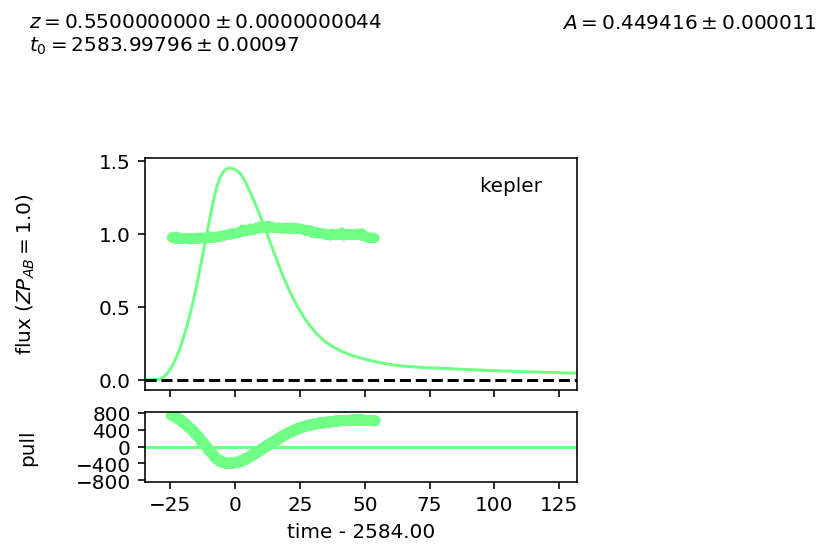

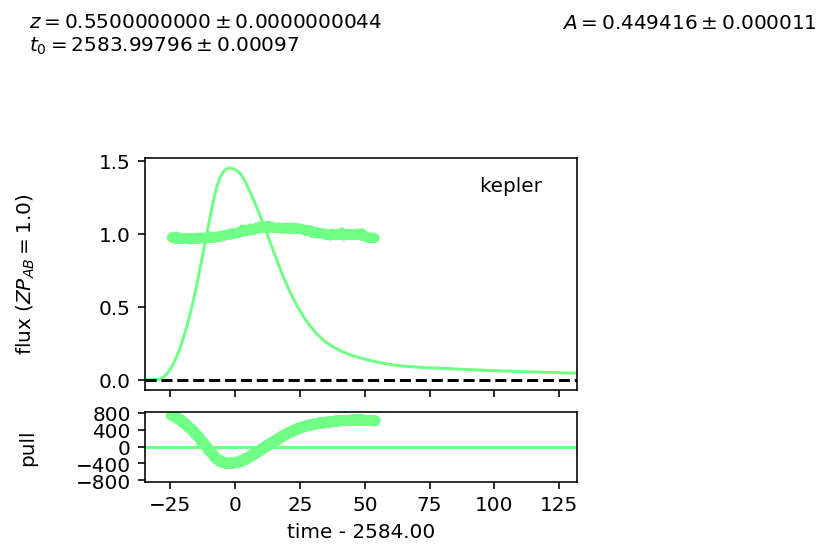

In [229]:
sncosmo.plot_lc(data_dict, model=fitted_model, errors=result.errors, zp=1.0)

In [224]:
#data = sncosmo.load_example_data()
#sncosmo.plot_lc(data)

In [ ]:

import sncosmo
lcinj = lc.inject_sn(t0=np.nanmedian(lc.time), source='hsiao', z=0.5, amplitude=2.e-4)
        model = sncosmo.Model(source='hsiao')
        model.set(t0=t0, **kwargs)
bandflux = model.bandflux('kepler', self.time)
mergedflux = self.flux + bandflux